In [33]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

In [34]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)



In [35]:
import util
X, Y = util.load_dataset('triangle_train.csv', add_intercept=False)
# Set the mean and standard deviation for the Gaussian noise
mean = 0
std_dev = 0.35

# Generate the Gaussian noise
noise = np.random.normal(mean, std_dev, X.shape)
# X = X + noise
X = torch.from_numpy(X).type(torch.FloatTensor)
Y = torch.from_numpy(Y).type(torch.FloatTensor)
print(X)

tensor([[2.9945, 0.2185],
        [2.2507, 0.7943],
        [0.0254, 0.0636],
        [1.7593, 0.9251],
        [1.9636, 0.7177],
        [3.1356, 2.3308],
        [2.8293, 0.7031],
        [2.2640, 0.7237],
        [1.3556, 3.6620],
        [3.8836, 3.8844],
        [2.9842, 3.8024],
        [3.4718, 3.0814],
        [2.5578, 2.9886],
        [2.7245, 3.7325],
        [1.3662, 2.1036],
        [3.2746, 1.8473],
        [3.6585, 2.9841],
        [1.4996, 3.9423],
        [2.7317, 3.7939],
        [0.2057, 0.7595],
        [2.3340, 3.8843],
        [1.3066, 2.2730],
        [3.8579, 2.1511],
        [0.4590, 3.8996],
        [0.3200, 0.9421],
        [3.7075, 3.5783],
        [1.2978, 3.7016],
        [3.5121, 0.1821],
        [2.7087, 3.4091],
        [2.3554, 3.7526],
        [3.1683, 3.1272],
        [0.0783, 2.6875],
        [3.8246, 3.9700],
        [2.5178, 3.9779],
        [2.7906, 3.1500],
        [3.1057, 2.0807],
        [1.6786, 0.7147],
        [2.6626, 2.8384],
        [1.1

In [50]:
class Triangle(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(Triangle, self).__init__()
        self.lin1 = nn.Linear(input_dim, 3)
        self.lin11 = nn.Linear(3, 3)
        self.lin2 = nn.Linear(3, output_dim)
        
    def lin1ac(self, x):
#         x = self.lin1(x)
#         x = torch.sigmoid(x)
        return x
    
    def lin11ac(self, x):
        x = self.lin1(x)
        x = torch.sigmoid(x)
        return x
    
    def lin2ac(self, x):
        x = self.lin2(x)
#         print('yhat',x)
        x = torch.sigmoid(x)
        x = x.reshape(-1)
        return x
    
    def forward(self, x):
#         print('x', x)
        x = self.lin1ac(x) 
        x = self.lin11ac(x)
#         print('h', x.size(), x)
        x = self.lin2ac(x)  
#         x = F.relu(x)
        return x

In [51]:
model = Triangle()


In [52]:
#Init with optimal weights
def weights_init_optimal(model):
    lin1_weights = torch.Tensor([[-1,0],[0,-1],[1,1]])
    lin1_bias = torch.Tensor([0.5, 0.5, -4])
    lin2_weights = torch.Tensor([1 ,1 ,1])
    lin2_bias = torch.Tensor([0])
    with torch.no_grad():
        model.lin1.weight.copy_(lin1_weights)
        model.lin1.bias.copy_(lin1_bias)
        model.lin2.weight.copy_(lin2_weights)
        model.lin2.bias.copy_(lin2_bias)

In [53]:
# weights_init(model)
loss_func = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
# weights_init_optimal(model)
weights_init(model)

In [54]:
x1 = torch.Tensor([0.2,2])
pred = model(x1)
print(pred)

tensor([0.3118], grad_fn=<ViewBackward0>)


In [55]:
y_hat = model(X)
print(y_hat)
print (Y.size())
loss = loss_func.forward(y_hat, Y)
print(loss)

tensor([0.3383, 0.3406, 0.3085, 0.3363, 0.3377, 0.3486, 0.3435, 0.3402, 0.3252,
        0.3411, 0.3340, 0.3450, 0.3338, 0.3325, 0.3241, 0.3524, 0.3489, 0.3267,
        0.3325, 0.3108, 0.3304, 0.3230, 0.3566, 0.3210, 0.3123, 0.3422, 0.3250,
        0.3397, 0.3332, 0.3305, 0.3401, 0.3137, 0.3398, 0.3314, 0.3353, 0.3500,
        0.3347, 0.3362, 0.3251, 0.3445, 0.3283, 0.3307, 0.3178, 0.3400, 0.3378,
        0.3326, 0.3550, 0.3464, 0.3414, 0.3392, 0.3299, 0.3416, 0.3347, 0.3092,
        0.3307, 0.3396, 0.3339, 0.3531, 0.3189, 0.3244, 0.3503, 0.3163, 0.3247,
        0.3263, 0.3265, 0.3232, 0.3236, 0.3507, 0.3386, 0.3281, 0.3218, 0.3321,
        0.3208, 0.3489, 0.3139, 0.3215, 0.3297, 0.3248, 0.3459, 0.3254, 0.3323,
        0.3271, 0.3102, 0.3513, 0.3223, 0.3109, 0.3394, 0.3315, 0.3182, 0.3532,
        0.3306, 0.3520, 0.3417, 0.3273, 0.3337, 0.3502, 0.3151, 0.3232, 0.3247,
        0.3287, 0.3103, 0.3444, 0.3180, 0.3402, 0.3447, 0.3180, 0.3510, 0.3294,
        0.3286, 0.3222, 0.3335, 0.3367, 

In [56]:
# epochs = 2000
# for i in range(epochs):
#     optimizer.zero_grad()
#     y_hat = model(X)
# #         print(y_hat)
#     loss = loss_func.forward(y_hat, Y)
#     loss.backward()
#     optimizer.step()

# #     if i % 500 == 0:
#     print ("Epoch: {0}, Loss: {1}, ".format(i, loss.data.item()))

In [57]:
epochs = 40000
batchsize = 16
steps = X.size(0)
for i in range(epochs):
    for j in range(0,steps,batchsize):
#         data_points = np.random.randint(X.size(0), size=448)
        end = min(j+batchsize, X.size(0))
        x_var = Variable(X[j:end], requires_grad=False)
        y_var = Variable(Y[j:end], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var).squeeze()
#         print('y_hat=', y_hat, 'y_var=', y_var)
        loss = loss_func.forward(y_hat, y_var)
#         print(loss)
        loss.backward()
        optimizer.step()
        
#     if i % 500 == 0:
    y_hat = model(X)
    loss = loss_func.forward(y_hat, Y)
    print ("Epoch: {0}, Loss: {1}, ".format(i, loss.data.item()))

Epoch: 0, Loss: 0.5375463366508484, 
Epoch: 1, Loss: 0.5266017317771912, 
Epoch: 2, Loss: 0.5249256491661072, 
Epoch: 3, Loss: 0.5239570736885071, 
Epoch: 4, Loss: 0.5229800343513489, 
Epoch: 5, Loss: 0.5219729542732239, 
Epoch: 6, Loss: 0.5209406614303589, 
Epoch: 7, Loss: 0.5198795199394226, 
Epoch: 8, Loss: 0.5187863111495972, 
Epoch: 9, Loss: 0.5176557898521423, 
Epoch: 10, Loss: 0.5164812207221985, 
Epoch: 11, Loss: 0.5152543783187866, 
Epoch: 12, Loss: 0.5139670968055725, 
Epoch: 13, Loss: 0.5126112103462219, 
Epoch: 14, Loss: 0.5111789107322693, 
Epoch: 15, Loss: 0.5096625685691833, 
Epoch: 16, Loss: 0.5080546736717224, 
Epoch: 17, Loss: 0.5063475370407104, 
Epoch: 18, Loss: 0.5045334696769714, 
Epoch: 19, Loss: 0.5026049017906189, 
Epoch: 20, Loss: 0.500554084777832, 
Epoch: 21, Loss: 0.4983735978603363, 
Epoch: 22, Loss: 0.49605607986450195, 
Epoch: 23, Loss: 0.4935949742794037, 
Epoch: 24, Loss: 0.49098438024520874, 
Epoch: 25, Loss: 0.4882194697856903, 
Epoch: 26, Loss: 0.48

Epoch: 214, Loss: 0.11188609153032303, 
Epoch: 215, Loss: 0.11154434829950333, 
Epoch: 216, Loss: 0.11120636761188507, 
Epoch: 217, Loss: 0.1108720675110817, 
Epoch: 218, Loss: 0.11054127663373947, 
Epoch: 219, Loss: 0.1102139949798584, 
Epoch: 220, Loss: 0.10989003628492355, 
Epoch: 221, Loss: 0.10956939309835434, 
Epoch: 222, Loss: 0.10925193130970001, 
Epoch: 223, Loss: 0.10893760621547699, 
Epoch: 224, Loss: 0.10862624645233154, 
Epoch: 225, Loss: 0.10831789672374725, 
Epoch: 226, Loss: 0.10801239311695099, 
Epoch: 227, Loss: 0.10770966112613678, 
Epoch: 228, Loss: 0.10740964859724045, 
Epoch: 229, Loss: 0.10711228847503662, 
Epoch: 230, Loss: 0.10681748390197754, 
Epoch: 231, Loss: 0.10652518272399902, 
Epoch: 232, Loss: 0.10623527318239212, 
Epoch: 233, Loss: 0.10594775527715683, 
Epoch: 234, Loss: 0.10566253215074539, 
Epoch: 235, Loss: 0.10537952929735184, 
Epoch: 236, Loss: 0.10509871691465378, 
Epoch: 237, Loss: 0.10481997579336166, 
Epoch: 238, Loss: 0.1045432761311531, 
Epo

Epoch: 430, Loss: 0.05321924015879631, 
Epoch: 431, Loss: 0.05288559943437576, 
Epoch: 432, Loss: 0.05255207419395447, 
Epoch: 433, Loss: 0.0522187277674675, 
Epoch: 434, Loss: 0.051885660737752914, 
Epoch: 435, Loss: 0.051552895456552505, 
Epoch: 436, Loss: 0.05122051388025284, 
Epoch: 437, Loss: 0.050888530910015106, 
Epoch: 438, Loss: 0.05055709555745125, 
Epoch: 439, Loss: 0.0502261221408844, 
Epoch: 440, Loss: 0.04989578574895859, 
Epoch: 441, Loss: 0.049566060304641724, 
Epoch: 442, Loss: 0.04923703148961067, 
Epoch: 443, Loss: 0.048908744007349014, 
Epoch: 444, Loss: 0.04858124256134033, 
Epoch: 445, Loss: 0.0482545867562294, 
Epoch: 446, Loss: 0.04792879894375801, 
Epoch: 447, Loss: 0.04760393872857094, 
Epoch: 448, Loss: 0.04728006199002266, 
Epoch: 449, Loss: 0.04695716127753258, 
Epoch: 450, Loss: 0.04663533344864845, 
Epoch: 451, Loss: 0.04631458595395088, 
Epoch: 452, Loss: 0.04599496349692345, 
Epoch: 453, Loss: 0.04567647725343704, 
Epoch: 454, Loss: 0.04535921663045883,

Epoch: 645, Loss: 0.011210878379642963, 
Epoch: 646, Loss: 0.011142536997795105, 
Epoch: 647, Loss: 0.011074949987232685, 
Epoch: 648, Loss: 0.011008116416633129, 
Epoch: 649, Loss: 0.01094201859086752, 
Epoch: 650, Loss: 0.010876653715968132, 
Epoch: 651, Loss: 0.0108120022341609, 
Epoch: 652, Loss: 0.0107480613514781, 
Epoch: 653, Loss: 0.010684830136597157, 
Epoch: 654, Loss: 0.010622299276292324, 
Epoch: 655, Loss: 0.010560455732047558, 
Epoch: 656, Loss: 0.010499288327991962, 
Epoch: 657, Loss: 0.01043879333883524, 
Epoch: 658, Loss: 0.010378971695899963, 
Epoch: 659, Loss: 0.010319799184799194, 
Epoch: 660, Loss: 0.010261276736855507, 
Epoch: 661, Loss: 0.01020339597016573, 
Epoch: 662, Loss: 0.010146146640181541, 
Epoch: 663, Loss: 0.010089531540870667, 
Epoch: 664, Loss: 0.010033526457846165, 
Epoch: 665, Loss: 0.00997813232243061, 
Epoch: 666, Loss: 0.009923345409333706, 
Epoch: 667, Loss: 0.009869152680039406, 
Epoch: 668, Loss: 0.009815546683967113, 
Epoch: 669, Loss: 0.0097

Epoch: 864, Loss: 0.004977353848516941, 
Epoch: 865, Loss: 0.0049661071971058846, 
Epoch: 866, Loss: 0.004954920616000891, 
Epoch: 867, Loss: 0.004943794570863247, 
Epoch: 868, Loss: 0.004932727199047804, 
Epoch: 869, Loss: 0.004921716172248125, 
Epoch: 870, Loss: 0.004910763818770647, 
Epoch: 871, Loss: 0.004899867810308933, 
Epoch: 872, Loss: 0.004889030009508133, 
Epoch: 873, Loss: 0.004878251813352108, 
Epoch: 874, Loss: 0.0048675243742764, 
Epoch: 875, Loss: 0.0048568579368293285, 
Epoch: 876, Loss: 0.0048462459817528725, 
Epoch: 877, Loss: 0.004835686180740595, 
Epoch: 878, Loss: 0.004825178533792496, 
Epoch: 879, Loss: 0.004814725834876299, 
Epoch: 880, Loss: 0.004804329015314579, 
Epoch: 881, Loss: 0.004793982021510601, 
Epoch: 882, Loss: 0.004783689975738525, 
Epoch: 883, Loss: 0.0047734505496919155, 
Epoch: 884, Loss: 0.004763263277709484, 
Epoch: 885, Loss: 0.00475312490016222, 
Epoch: 886, Loss: 0.004743038211017847, 
Epoch: 887, Loss: 0.004733003675937653, 
Epoch: 888, Los

Epoch: 1079, Loss: 0.003419011365622282, 
Epoch: 1080, Loss: 0.0034142828080803156, 
Epoch: 1081, Loss: 0.003409562399610877, 
Epoch: 1082, Loss: 0.0034048615489155054, 
Epoch: 1083, Loss: 0.0034001728054136038, 
Epoch: 1084, Loss: 0.0033954980317503214, 
Epoch: 1085, Loss: 0.003390837926417589, 
Epoch: 1086, Loss: 0.003386193187907338, 
Epoch: 1087, Loss: 0.0033815561328083277, 
Epoch: 1088, Loss: 0.0033769377041608095, 
Epoch: 1089, Loss: 0.0033723334781825542, 
Epoch: 1090, Loss: 0.0033677448518574238, 
Epoch: 1091, Loss: 0.0033631634432822466, 
Epoch: 1092, Loss: 0.0033585992641747, 
Epoch: 1093, Loss: 0.003354047890752554, 
Epoch: 1094, Loss: 0.0033495102543383837, 
Epoch: 1095, Loss: 0.0033449905458837748, 
Epoch: 1096, Loss: 0.0033404831774532795, 
Epoch: 1097, Loss: 0.0033359911758452654, 
Epoch: 1098, Loss: 0.0033315117470920086, 
Epoch: 1099, Loss: 0.0033270439598709345, 
Epoch: 1100, Loss: 0.0033225950319319963, 
Epoch: 1101, Loss: 0.0033181514590978622, 
Epoch: 1102, Loss: 

Epoch: 1292, Loss: 0.0026553082279860973, 
Epoch: 1293, Loss: 0.0026525896973907948, 
Epoch: 1294, Loss: 0.002649868605658412, 
Epoch: 1295, Loss: 0.0026471572928130627, 
Epoch: 1296, Loss: 0.0026444478426128626, 
Epoch: 1297, Loss: 0.0026417418848723173, 
Epoch: 1298, Loss: 0.0026390496641397476, 
Epoch: 1299, Loss: 0.0026363602373749018, 
Epoch: 1300, Loss: 0.002633672673255205, 
Epoch: 1301, Loss: 0.002630999544635415, 
Epoch: 1302, Loss: 0.0026283212937414646, 
Epoch: 1303, Loss: 0.0026256591081619263, 
Epoch: 1304, Loss: 0.002622996224090457, 
Epoch: 1305, Loss: 0.0026203379966318607, 
Epoch: 1306, Loss: 0.002617692807689309, 
Epoch: 1307, Loss: 0.0026150483172386885, 
Epoch: 1308, Loss: 0.0026124080177396536, 
Epoch: 1309, Loss: 0.002609774237498641, 
Epoch: 1310, Loss: 0.0026071458123624325, 
Epoch: 1311, Loss: 0.0026045269332826138, 
Epoch: 1312, Loss: 0.0026019117794930935, 
Epoch: 1313, Loss: 0.0025993024464696646, 
Epoch: 1314, Loss: 0.002596695441752672, 
Epoch: 1315, Loss:

KeyboardInterrupt: 

In [11]:
from matplotlib.ticker import MaxNLocator
def plot_contour(predict_fn, minx, maxx, miny, maxy, fig, ax):
    """Plot a contour given the provided prediction function"""
    print(minx, maxx)
    print(miny, maxy)
    x, y = np.meshgrid(np.linspace(minx, maxx, num=20), np.linspace(miny, maxy, num=20))
    z = np.zeros(x.shape)
    
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
#             print(predict_fn(np.array([[x[i, j], y[i, j]]])))
            z[i, j] = predict_fn(np.array([[x[i, j], y[i, j]]]))[0]

#     plt.contourf(x, y, z, levels=[-float('inf'), 0.1, 0.8, float('inf')], colors=['orange', 'cyan'])
#     locator=MaxNLocator(prune='both',nbins=5)
#     plt.set_major_locator(locator)  # Place major ticks at every multiple of 5
    contour = ax.contourf(x, y, z, levels=10, cmap='Pastel1', extend='both')
#     ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Example for y-axis
#     ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Example for x-axis

    # Add colorbar and labels
    fig.colorbar(contour, ax=ax)


def plot(x, y, predict_fn, save_path=None):
    """Plot dataset and fitted logistic regression parameters.

    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        save_path: Path to save the plot.
        correction: Correction factor to apply, if any.
    """
    # Plot dataset
#     plt.figure()
    
    # Create contour plot
    fig, ax = plt.subplots()
    
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)
    
    minx = min(x[:,-2])
    maxx = max(x[:,-2])
    miny = min(x[:,-1])
    maxy = max(x[:,-1])

    plot_contour(predict_fn, minx, maxx, miny, maxy, fig, ax)

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    if save_path is not None:
        plt.savefig(save_path)


In [87]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-4.5038,  0.3662],
        [-2.3887, -3.9898],
        [-6.3332, -0.9736]], requires_grad=True), Parameter containing:
tensor([-2.7821, 13.4171,  8.4880], requires_grad=True), Parameter containing:
tensor([[-2.4308,  8.8175,  4.8917],
        [ 5.8234,  1.5632,  6.4074],
        [ 1.5088, -0.1031, -0.8978]], requires_grad=True), Parameter containing:
tensor([ 2.4036, -0.6159, -0.5887], requires_grad=True), Parameter containing:
tensor([[-10.0606,   9.8311,  -0.5251]], requires_grad=True), Parameter containing:
tensor([8.7917], requires_grad=True)]


In [53]:
step_predict = lambda data: model.lin1(torch.Tensor(data)).detach().numpy()
lin1 = step_predict(X)
step_predict = lambda data: model.lin1ac(torch.Tensor(data)).detach().numpy()
lin1ac = step_predict(X)
for i in range(32):
    print(X[i], lin1[i], lin1ac[i])


tensor([2.8161, 0.2179]) [ -4.955368   -21.91182      0.75993633] [6.9961953e-03 3.0466160e-10 6.8133992e-01]
tensor([2.3050, 0.9360]) [ -4.014923 -17.149033  -2.606036] [1.7724516e-02 3.5667259e-08 6.8750970e-02]
tensor([-0.0793, -0.1413]) [-20.305197    5.2449627   3.3709583] [1.5190257e-09 9.9475360e-01 9.6678448e-01]
tensor([1.7249, 0.8048]) [ -7.367115  -11.705438   -1.7928426] [6.3128921e-04 8.2487750e-06 1.4272456e-01]
tensor([1.7680, 0.4859]) [ -8.652823   -12.096837    -0.24414039] [1.7460258e-04 5.5770947e-06 4.3926626e-01]
tensor([3.3664, 2.6166]) [  8.8469925 -27.165691  -11.148647 ] [9.9985623e-01 1.5925393e-12 1.4394538e-05]
tensor([3.1737, 0.4811]) [ -2.037302  -25.274971   -0.6341193] [1.1534175e-01 1.0549201e-11 3.4657708e-01]
tensor([2.6392, 0.6233]) [ -3.8968382 -20.269936   -1.1734402] [1.9901887e-02 1.5735437e-09 2.3623371e-01]
tensor([1.4623, 3.4021]) [  3.523735  -9.346083 -14.434477] [9.713557e-01 8.729914e-05 5.385005e-07]
tensor([4.4927, 3.5639]) [ 18.58996  -

tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


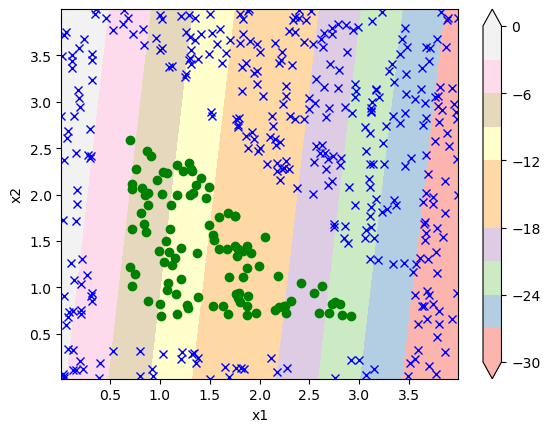

In [94]:
step_predict = lambda data: model.lin1(torch.Tensor(data)).detach().numpy().reshape(-1,1)[0]
step_y_pred = step_predict(X)
plot(X, Y, step_predict)

tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


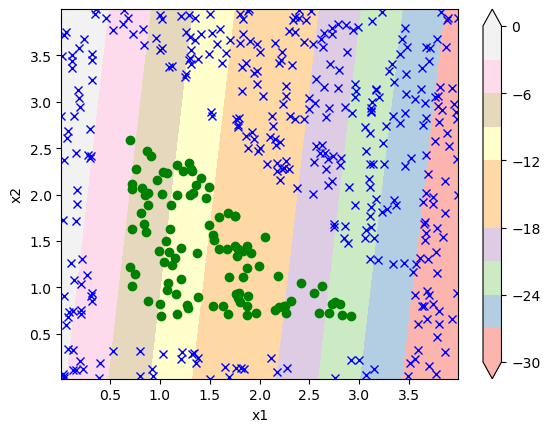

In [95]:
step_predict = lambda data: model.lin1ac(torch.Tensor(data)).detach().numpy().reshape(-1,1)[0]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'sigmoid_h1.pdf')

tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


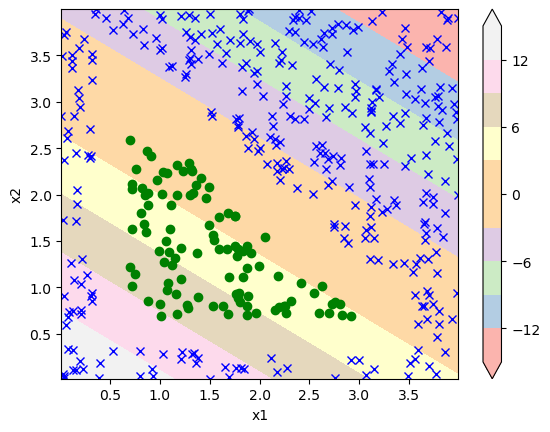

In [96]:
step_predict = lambda data: model.lin1ac(torch.Tensor(data)).detach().numpy().reshape(-1,1)[1]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'sigmoid_h2.pdf')

tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


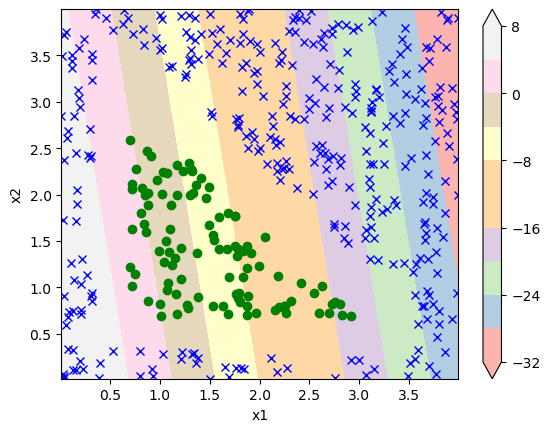

In [97]:
step_predict = lambda data: model.lin1ac(torch.Tensor(data)).detach().numpy().reshape(-1,1)[2]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'sigmoid_h3.pdf')

tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


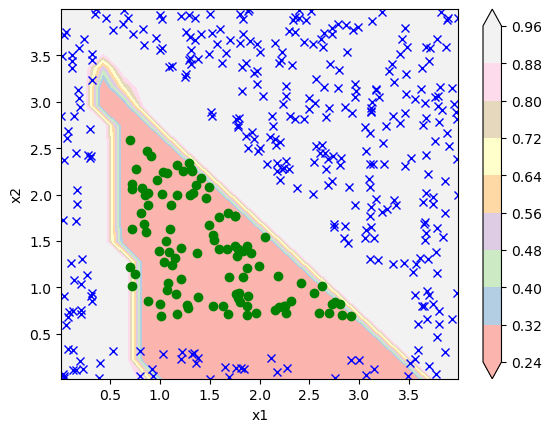

In [98]:
step_predict = lambda data: model(torch.Tensor(data)).detach().numpy()
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'sigmoid_o.pdf')

In [12]:
# Same as linear regression! 
from vector_quantize import VectorQuantize

num_codes = 16
num_codes1 = 8

class VQTriangle(nn.Module):
    def __init__(self, input_dim=2, output_dim=1):
        super(VQTriangle, self).__init__()
        self.lin1 = nn.Linear(input_dim, 3)
        self.lin11 = nn.Linear(3, 3)
        self.lin2 = nn.Linear(3, output_dim)
        self.vq = VectorQuantize(dim=3, accept_image_fmap=False, codebook_size=num_codes,
    rotation_trick=True, straight_through=False, 
#                                  learnable_codebook = True, 
#                                  in_place_codebook_optimizer=optim.SGD,
                                 ema_update = True, 
#                                  use_cosine_sim = True
                                )
#         self.vq1 = VectorQuantize(dim=3, accept_image_fmap=False, codebook_size=num_codes1,
#     rotation_trick=True, straight_through=False, 
# #                                  learnable_codebook = True, 
# #                                  in_place_codebook_optimizer=optim.SGD,
#                                  ema_update = True, 
# #                                  use_cosine_sim = True
#                                 )
        
    def lin1ac(self, x):
#         print('x', x)
        x = self.lin1(x)
#         x = torch.sigmoid(x*10)
        indices = 0
        commit_loss = 0
        x_vq, indices, commit_loss = self.vq(x)
        x = x + x_vq
        return x, indices, commit_loss
    
    def lin11ac(self, x):
#         print('x', x)
        x = self.lin11(x)
#         x = torch.sigmoid(x*10)
        indices = 0
        commit_loss = 0
#         x, indices, commit_loss = self.vq1(x)
        return x, indices, commit_loss
    
    def ffn(self, x):
        x11 = self.lin11(x)
        x11 = torch.sigmoid(x11)
        x =  x11 + x
        return x
    
    def lin2ac(self, x):
        x = self.lin2(x)
#         print('yhat',x)
        x = torch.sigmoid(x)
        x = x.reshape(-1)
#         x = F.relu(x)
        return x
            
    def forward(self, x):
        x, indices, commit_loss = self.lin1ac(x)
#         x, indices1, commit_loss1 = self.lin11ac(x)
        x = self.ffn(x)
#         print(x)
#         print('h', x.size(), x)
        
        x = self.lin2ac(x)
        return x, indices, commit_loss
    


In [13]:
def weights_copy_optimal(model1, model2):
    with torch.no_grad():
        model1.lin1.weight.copy_(model2.lin1.weight)
        model1.lin1.bias.copy_(model2.lin1.bias)
        model1.lin2.weight.copy_(model2.lin2.weight)
        model1.lin2.bias.copy_(model2.lin2.bias)

In [14]:
vqmodel = VQTriangle()
# weights_init_optimal(vqmodel)
weights_init(vqmodel)
# weights_copy_optimal(vqmodel, model)
optimizer = optim.SGD(vqmodel.parameters(), lr=0.02, momentum=0.9)
# vqmodel.vq.in_place_codebook_optimizer = optim.SGD(vqmodel.vq._codebook.parameters(),lr=0.02, momentum=0.9) 
# vqmodel.vq1.in_place_codebook_optimizer = optim.SGD(vqmodel.vq1._codebook.parameters(),lr=0.02, momentum=0.9) 

In [15]:
# vqmodel.vq._codebook.embed = torch.nn.Parameter(torch.Tensor([[[0,0,0], [0,0,1], [0,1,0], [0,1,1], [1,0,0], [1,0,1], [1,1,0], [1,1,1] ]]))
# vqmodel.vq.in_place_codebook_optimizer = optim.SGD(vqmodel.vq._codebook.parameters(),lr=0.02, momentum=0.9) 

In [16]:
print((vqmodel.vq._codebook.embed))
# print((vqmodel.vq1._codebook.embed))
print(list(vqmodel.parameters()))


tensor([[[-0.0332,  0.1528, -0.2200],
         [-0.1869, -0.0341, -0.2483],
         [ 0.2173,  0.0289,  0.2115],
         [ 0.1893, -0.2725, -0.2204],
         [-0.2418, -0.1136, -0.1292],
         [-0.0570, -0.3420,  0.1493],
         [ 0.2006,  0.1121,  0.2247],
         [ 0.2656, -0.3490,  0.0534],
         [ 0.3280, -0.2562, -0.1574],
         [-0.0186, -0.2199, -0.0666],
         [-0.0522,  0.3150, -0.0222],
         [ 0.1917,  0.2589,  0.1575],
         [-0.3075,  0.2650,  0.2332],
         [-0.2534, -0.1261,  0.2406],
         [-0.3437, -0.3099, -0.2396],
         [ 0.1102, -0.1444, -0.3153]]])
[Parameter containing:
tensor([[-1.1158, -0.3666],
        [ 0.5170, -0.4017],
        [-1.9081, -1.6321]], requires_grad=True), Parameter containing:
tensor([-0.6633, -0.2254,  0.3448], requires_grad=True), Parameter containing:
tensor([[-1.5677,  2.1440,  0.8769],
        [-1.0878, -0.2274, -0.3559],
        [-0.2357, -0.8783, -0.3066]], requires_grad=True), Parameter containing:
tenso

In [66]:
# x1 = torch.Tensor([[0.2,2]])
# pred, ind, comlos = vqmodel(x1)
# print(pred)
# for i in range(X.size(0)):
#     y_hat, indi, comlos = vqmodel(X[i:i+1])
#     loss = loss_func.forward(y_hat, Y[i:i+1])
#     print(loss)

In [67]:
# epochs = 8000
# alpha=5
# for i in range(epochs):
#     optimizer.zero_grad()
#     y_hat, indices, commit_loss = vqmodel(X)
#     loss = loss_func.forward(y_hat, Y)
#     (loss + alpha * commit_loss).backward()

#     optimizer.step()

# #     if i % 500 == 0:
#     print ("Epoch: {0}, Loss: {1}, ".format(i, loss.data.item()))
#     print(list(vqmodel.parameters()))

In [17]:
alpha = 0.5
epochs = 4000
batchsize = 16
steps = X.size(0)
for i in range(epochs):
    for j in range(0,steps,batchsize):
#         data_points = np.random.randint(X.size(0), size=448)
        end = min(j+batchsize, X.size(0))
        x_var = Variable(X[j:end], requires_grad=False)
        y_var = Variable(Y[j:end], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat, ind, commit_loss = vqmodel(x_var)
#         print('y_hat=', y_hat, 'y_var=', y_var)
        loss = loss_func.forward(y_hat.squeeze(), y_var)
#         print(loss)
        (loss + alpha * commit_loss).backward()
        optimizer.step()
        
#     if i % 500 == 0:
    y_hat,_,_ = vqmodel(X)
    loss = loss_func.forward(y_hat, Y)
    print ("Epoch: {0}, Loss: {1}, ".format(i, loss.data.item()))

Epoch: 0, Loss: 0.4962574541568756, 
Epoch: 1, Loss: 0.4443238377571106, 
Epoch: 2, Loss: 0.44923120737075806, 
Epoch: 3, Loss: 0.4380965828895569, 
Epoch: 4, Loss: 0.44143399596214294, 
Epoch: 5, Loss: 0.4389035701751709, 
Epoch: 6, Loss: 0.43702659010887146, 
Epoch: 7, Loss: 0.4314061105251312, 
Epoch: 8, Loss: 0.4330745339393616, 
Epoch: 9, Loss: 0.4268588423728943, 
Epoch: 10, Loss: 0.4265734851360321, 
Epoch: 11, Loss: 0.4221671223640442, 
Epoch: 12, Loss: 0.4217524528503418, 
Epoch: 13, Loss: 0.41278520226478577, 
Epoch: 14, Loss: 0.40783995389938354, 
Epoch: 15, Loss: 0.3996025621891022, 
Epoch: 16, Loss: 0.39418238401412964, 
Epoch: 17, Loss: 0.3891948163509369, 
Epoch: 18, Loss: 0.38607093691825867, 
Epoch: 19, Loss: 0.37910160422325134, 
Epoch: 20, Loss: 0.38181424140930176, 
Epoch: 21, Loss: 0.41880160570144653, 
Epoch: 22, Loss: 0.4301857650279999, 
Epoch: 23, Loss: 0.4620492160320282, 
Epoch: 24, Loss: 0.44182777404785156, 
Epoch: 25, Loss: 0.42516422271728516, 
Epoch: 26,

Epoch: 214, Loss: 0.4529973566532135, 
Epoch: 215, Loss: 0.43385884165763855, 
Epoch: 216, Loss: 0.39745432138442993, 
Epoch: 217, Loss: 0.43848589062690735, 
Epoch: 218, Loss: 0.4469774663448334, 
Epoch: 219, Loss: 0.43829020857810974, 
Epoch: 220, Loss: 0.42186465859413147, 
Epoch: 221, Loss: 0.42574867606163025, 
Epoch: 222, Loss: 0.5107744932174683, 
Epoch: 223, Loss: 0.4952720105648041, 
Epoch: 224, Loss: 0.44179418683052063, 
Epoch: 225, Loss: 0.4318590462207794, 
Epoch: 226, Loss: 0.45422694087028503, 
Epoch: 227, Loss: 0.44130799174308777, 
Epoch: 228, Loss: 0.4103401303291321, 
Epoch: 229, Loss: 0.4801671802997589, 
Epoch: 230, Loss: 0.4348779618740082, 
Epoch: 231, Loss: 0.4169386029243469, 
Epoch: 232, Loss: 0.46782585978507996, 
Epoch: 233, Loss: 0.46484309434890747, 
Epoch: 234, Loss: 0.4201805293560028, 
Epoch: 235, Loss: 0.41454997658729553, 
Epoch: 236, Loss: 0.4156021475791931, 
Epoch: 237, Loss: 0.5159569382667542, 
Epoch: 238, Loss: 0.4417722523212433, 
Epoch: 239, L

Epoch: 426, Loss: 0.4292759299278259, 
Epoch: 427, Loss: 0.4045257568359375, 
Epoch: 428, Loss: 0.43675559759140015, 
Epoch: 429, Loss: 0.41620561480522156, 
Epoch: 430, Loss: 0.42141565680503845, 
Epoch: 431, Loss: 0.4728271961212158, 
Epoch: 432, Loss: 0.50583416223526, 
Epoch: 433, Loss: 0.5415684580802917, 
Epoch: 434, Loss: 0.39702290296554565, 
Epoch: 435, Loss: 0.4294573962688446, 
Epoch: 436, Loss: 0.4350634515285492, 
Epoch: 437, Loss: 0.40572303533554077, 
Epoch: 438, Loss: 0.4879775643348694, 
Epoch: 439, Loss: 0.4507780373096466, 
Epoch: 440, Loss: 0.39956316351890564, 
Epoch: 441, Loss: 0.48136672377586365, 
Epoch: 442, Loss: 0.4306735098361969, 
Epoch: 443, Loss: 0.4598134458065033, 
Epoch: 444, Loss: 0.4268721640110016, 
Epoch: 445, Loss: 0.45351794362068176, 
Epoch: 446, Loss: 0.40924400091171265, 
Epoch: 447, Loss: 0.520598292350769, 
Epoch: 448, Loss: 0.3989579975605011, 
Epoch: 449, Loss: 0.4843645691871643, 
Epoch: 450, Loss: 0.418818861246109, 
Epoch: 451, Loss: 0.

Epoch: 638, Loss: 0.482512891292572, 
Epoch: 639, Loss: 0.49333319067955017, 
Epoch: 640, Loss: 0.42454296350479126, 
Epoch: 641, Loss: 0.44797518849372864, 
Epoch: 642, Loss: 0.38575467467308044, 
Epoch: 643, Loss: 0.38437262177467346, 
Epoch: 644, Loss: 0.33061090111732483, 
Epoch: 645, Loss: 0.4042767882347107, 
Epoch: 646, Loss: 0.4449145495891571, 
Epoch: 647, Loss: 0.45038291811943054, 
Epoch: 648, Loss: 0.47172003984451294, 
Epoch: 649, Loss: 0.5384272933006287, 
Epoch: 650, Loss: 0.4409492313861847, 
Epoch: 651, Loss: 0.4398888647556305, 
Epoch: 652, Loss: 0.411345511674881, 
Epoch: 653, Loss: 0.40999463200569153, 
Epoch: 654, Loss: 0.3968641459941864, 
Epoch: 655, Loss: 0.410986989736557, 
Epoch: 656, Loss: 0.4086669385433197, 
Epoch: 657, Loss: 0.4128917157649994, 
Epoch: 658, Loss: 0.4243371784687042, 
Epoch: 659, Loss: 0.44783273339271545, 
Epoch: 660, Loss: 0.38814857602119446, 
Epoch: 661, Loss: 0.40865206718444824, 
Epoch: 662, Loss: 0.43042728304862976, 
Epoch: 663, Los

Epoch: 848, Loss: 0.3800179362297058, 
Epoch: 849, Loss: 0.3877358138561249, 
Epoch: 850, Loss: 0.3641594350337982, 
Epoch: 851, Loss: 0.4079609513282776, 
Epoch: 852, Loss: 0.4823693633079529, 
Epoch: 853, Loss: 0.43980056047439575, 
Epoch: 854, Loss: 0.4803105890750885, 
Epoch: 855, Loss: 0.4577159285545349, 
Epoch: 856, Loss: 0.43014439940452576, 
Epoch: 857, Loss: 0.3944982886314392, 
Epoch: 858, Loss: 0.44005101919174194, 
Epoch: 859, Loss: 0.4549093246459961, 
Epoch: 860, Loss: 0.4454650282859802, 
Epoch: 861, Loss: 0.4674970507621765, 
Epoch: 862, Loss: 0.4409053921699524, 
Epoch: 863, Loss: 0.41100645065307617, 
Epoch: 864, Loss: 0.4534929692745209, 
Epoch: 865, Loss: 0.5145953893661499, 
Epoch: 866, Loss: 0.5130365490913391, 
Epoch: 867, Loss: 0.40488865971565247, 
Epoch: 868, Loss: 0.442057341337204, 
Epoch: 869, Loss: 0.46421363949775696, 
Epoch: 870, Loss: 0.3726409375667572, 
Epoch: 871, Loss: 0.3884793817996979, 
Epoch: 872, Loss: 0.3638102114200592, 
Epoch: 873, Loss: 0.

Epoch: 1056, Loss: 0.36574870347976685, 
Epoch: 1057, Loss: 0.3675737679004669, 
Epoch: 1058, Loss: 0.4032159447669983, 
Epoch: 1059, Loss: 0.4793495833873749, 
Epoch: 1060, Loss: 0.411776065826416, 
Epoch: 1061, Loss: 0.4285166561603546, 
Epoch: 1062, Loss: 0.33792734146118164, 
Epoch: 1063, Loss: 0.3798706829547882, 
Epoch: 1064, Loss: 0.37608247995376587, 
Epoch: 1065, Loss: 0.3872261345386505, 
Epoch: 1066, Loss: 0.4807438850402832, 
Epoch: 1067, Loss: 0.4724568724632263, 
Epoch: 1068, Loss: 0.4086574912071228, 
Epoch: 1069, Loss: 0.4376946985721588, 
Epoch: 1070, Loss: 0.440385103225708, 
Epoch: 1071, Loss: 0.40395474433898926, 
Epoch: 1072, Loss: 0.35783764719963074, 
Epoch: 1073, Loss: 0.3509918749332428, 
Epoch: 1074, Loss: 0.5779845118522644, 
Epoch: 1075, Loss: 0.3569319546222687, 
Epoch: 1076, Loss: 0.3539668917655945, 
Epoch: 1077, Loss: 0.38236960768699646, 
Epoch: 1078, Loss: 0.4233221411705017, 
Epoch: 1079, Loss: 0.4205341637134552, 
Epoch: 1080, Loss: 0.395476281642913

Epoch: 1265, Loss: 0.41084423661231995, 
Epoch: 1266, Loss: 0.4370903968811035, 
Epoch: 1267, Loss: 0.4252780079841614, 
Epoch: 1268, Loss: 0.42901235818862915, 
Epoch: 1269, Loss: 0.4271572530269623, 
Epoch: 1270, Loss: 0.3260314166545868, 
Epoch: 1271, Loss: 0.4700748324394226, 
Epoch: 1272, Loss: 0.3862582743167877, 
Epoch: 1273, Loss: 0.39101412892341614, 
Epoch: 1274, Loss: 0.3712308406829834, 
Epoch: 1275, Loss: 0.4229279160499573, 
Epoch: 1276, Loss: 0.39192384481430054, 
Epoch: 1277, Loss: 0.4090578854084015, 
Epoch: 1278, Loss: 0.3939925730228424, 
Epoch: 1279, Loss: 0.39667484164237976, 
Epoch: 1280, Loss: 0.37860608100891113, 
Epoch: 1281, Loss: 0.45159074664115906, 
Epoch: 1282, Loss: 0.4225475788116455, 
Epoch: 1283, Loss: 0.3819858729839325, 
Epoch: 1284, Loss: 0.48193129897117615, 
Epoch: 1285, Loss: 0.44931796193122864, 
Epoch: 1286, Loss: 0.5166258215904236, 
Epoch: 1287, Loss: 0.37253931164741516, 
Epoch: 1288, Loss: 0.4131796956062317, 
Epoch: 1289, Loss: 0.403456956

Epoch: 1472, Loss: 0.5339446067810059, 
Epoch: 1473, Loss: 0.40188345313072205, 
Epoch: 1474, Loss: 0.42137911915779114, 
Epoch: 1475, Loss: 0.36444881558418274, 
Epoch: 1476, Loss: 0.3649258315563202, 
Epoch: 1477, Loss: 0.4193926453590393, 
Epoch: 1478, Loss: 0.45223474502563477, 
Epoch: 1479, Loss: 0.4981219172477722, 
Epoch: 1480, Loss: 0.5221172571182251, 
Epoch: 1481, Loss: 0.4605381488800049, 
Epoch: 1482, Loss: 0.49421408772468567, 
Epoch: 1483, Loss: 0.37835314869880676, 
Epoch: 1484, Loss: 0.3672526478767395, 
Epoch: 1485, Loss: 0.4102197289466858, 
Epoch: 1486, Loss: 0.3588882386684418, 
Epoch: 1487, Loss: 0.44682469964027405, 
Epoch: 1488, Loss: 0.3753259479999542, 
Epoch: 1489, Loss: 0.3721705973148346, 
Epoch: 1490, Loss: 0.5136851072311401, 
Epoch: 1491, Loss: 0.46086543798446655, 
Epoch: 1492, Loss: 0.38168272376060486, 
Epoch: 1493, Loss: 0.43816128373146057, 
Epoch: 1494, Loss: 0.42193934321403503, 
Epoch: 1495, Loss: 0.43906497955322266, 
Epoch: 1496, Loss: 0.4671351

Epoch: 1679, Loss: 0.3989737033843994, 
Epoch: 1680, Loss: 0.33868247270584106, 
Epoch: 1681, Loss: 0.4164400100708008, 
Epoch: 1682, Loss: 0.38481202721595764, 
Epoch: 1683, Loss: 0.36522895097732544, 
Epoch: 1684, Loss: 0.4784291088581085, 
Epoch: 1685, Loss: 0.47322526574134827, 
Epoch: 1686, Loss: 0.31582149863243103, 
Epoch: 1687, Loss: 0.44906097650527954, 
Epoch: 1688, Loss: 0.36213240027427673, 
Epoch: 1689, Loss: 0.4562380611896515, 
Epoch: 1690, Loss: 0.44568580389022827, 
Epoch: 1691, Loss: 0.3856855034828186, 
Epoch: 1692, Loss: 0.45041990280151367, 
Epoch: 1693, Loss: 0.34914058446884155, 
Epoch: 1694, Loss: 0.39408135414123535, 
Epoch: 1695, Loss: 0.3487110733985901, 
Epoch: 1696, Loss: 0.34968137741088867, 
Epoch: 1697, Loss: 0.43668147921562195, 
Epoch: 1698, Loss: 0.3691116273403168, 
Epoch: 1699, Loss: 0.36980563402175903, 
Epoch: 1700, Loss: 0.4748413860797882, 
Epoch: 1701, Loss: 0.39213037490844727, 
Epoch: 1702, Loss: 0.38070210814476013, 
Epoch: 1703, Loss: 0.390

Epoch: 1886, Loss: 0.3653377592563629, 
Epoch: 1887, Loss: 0.36343663930892944, 
Epoch: 1888, Loss: 0.3985878527164459, 
Epoch: 1889, Loss: 0.3885924518108368, 
Epoch: 1890, Loss: 0.3819582462310791, 
Epoch: 1891, Loss: 0.3738827705383301, 
Epoch: 1892, Loss: 0.341327041387558, 
Epoch: 1893, Loss: 0.5130150318145752, 
Epoch: 1894, Loss: 0.4208032488822937, 
Epoch: 1895, Loss: 0.41372647881507874, 
Epoch: 1896, Loss: 0.42010101675987244, 
Epoch: 1897, Loss: 0.370117723941803, 
Epoch: 1898, Loss: 0.4493072032928467, 
Epoch: 1899, Loss: 0.41599902510643005, 
Epoch: 1900, Loss: 0.3537820279598236, 
Epoch: 1901, Loss: 0.34691891074180603, 
Epoch: 1902, Loss: 0.4166211485862732, 
Epoch: 1903, Loss: 0.3579581081867218, 
Epoch: 1904, Loss: 0.33717936277389526, 
Epoch: 1905, Loss: 0.3700745105743408, 
Epoch: 1906, Loss: 0.4722309112548828, 
Epoch: 1907, Loss: 0.47812941670417786, 
Epoch: 1908, Loss: 0.47420358657836914, 
Epoch: 1909, Loss: 0.5784074068069458, 
Epoch: 1910, Loss: 0.3968298137187

Epoch: 2090, Loss: 0.37227949500083923, 
Epoch: 2091, Loss: 0.355958491563797, 
Epoch: 2092, Loss: 0.3348274230957031, 
Epoch: 2093, Loss: 0.3340349793434143, 
Epoch: 2094, Loss: 0.3682139217853546, 
Epoch: 2095, Loss: 0.31495943665504456, 
Epoch: 2096, Loss: 0.5845980048179626, 
Epoch: 2097, Loss: 0.352874219417572, 
Epoch: 2098, Loss: 0.3326433002948761, 
Epoch: 2099, Loss: 0.34028974175453186, 
Epoch: 2100, Loss: 0.45006826519966125, 
Epoch: 2101, Loss: 0.32828229665756226, 
Epoch: 2102, Loss: 0.4086940586566925, 
Epoch: 2103, Loss: 0.3159767687320709, 
Epoch: 2104, Loss: 0.5594761371612549, 
Epoch: 2105, Loss: 0.3053341209888458, 
Epoch: 2106, Loss: 0.3497617244720459, 
Epoch: 2107, Loss: 0.3845890164375305, 
Epoch: 2108, Loss: 0.5310782790184021, 
Epoch: 2109, Loss: 0.4334609806537628, 
Epoch: 2110, Loss: 0.3964844346046448, 
Epoch: 2111, Loss: 0.3227705955505371, 
Epoch: 2112, Loss: 0.4511616826057434, 
Epoch: 2113, Loss: 0.3981999456882477, 
Epoch: 2114, Loss: 0.3842236399650574

Epoch: 2294, Loss: 0.3450963497161865, 
Epoch: 2295, Loss: 0.5595495104789734, 
Epoch: 2296, Loss: 0.3151644766330719, 
Epoch: 2297, Loss: 0.3377326428890228, 
Epoch: 2298, Loss: 0.378677099943161, 
Epoch: 2299, Loss: 0.3716264069080353, 
Epoch: 2300, Loss: 0.3356517255306244, 
Epoch: 2301, Loss: 0.5339238047599792, 
Epoch: 2302, Loss: 0.31764909625053406, 
Epoch: 2303, Loss: 0.42093440890312195, 
Epoch: 2304, Loss: 0.45081788301467896, 
Epoch: 2305, Loss: 0.35911840200424194, 
Epoch: 2306, Loss: 0.4407474100589752, 
Epoch: 2307, Loss: 0.41340914368629456, 
Epoch: 2308, Loss: 0.5015239715576172, 
Epoch: 2309, Loss: 0.3243867754936218, 
Epoch: 2310, Loss: 0.49562129378318787, 
Epoch: 2311, Loss: 0.32002678513526917, 
Epoch: 2312, Loss: 0.479013592004776, 
Epoch: 2313, Loss: 0.3785666525363922, 
Epoch: 2314, Loss: 0.36967018246650696, 
Epoch: 2315, Loss: 0.31149929761886597, 
Epoch: 2316, Loss: 0.3891594111919403, 
Epoch: 2317, Loss: 0.4198927581310272, 
Epoch: 2318, Loss: 0.382636219263

Epoch: 2501, Loss: 0.3899014890193939, 
Epoch: 2502, Loss: 0.4649893343448639, 
Epoch: 2503, Loss: 0.5100075602531433, 
Epoch: 2504, Loss: 0.387416273355484, 
Epoch: 2505, Loss: 0.46598413586616516, 
Epoch: 2506, Loss: 0.29917842149734497, 
Epoch: 2507, Loss: 0.48563504219055176, 
Epoch: 2508, Loss: 0.3381175398826599, 
Epoch: 2509, Loss: 0.4586542546749115, 
Epoch: 2510, Loss: 0.3353903889656067, 
Epoch: 2511, Loss: 0.48370856046676636, 
Epoch: 2512, Loss: 0.37700995802879333, 
Epoch: 2513, Loss: 0.5081692934036255, 
Epoch: 2514, Loss: 0.3154356777667999, 
Epoch: 2515, Loss: 0.3869374096393585, 
Epoch: 2516, Loss: 0.34492653608322144, 
Epoch: 2517, Loss: 0.4164457619190216, 
Epoch: 2518, Loss: 0.3794785439968109, 
Epoch: 2519, Loss: 0.3238810896873474, 
Epoch: 2520, Loss: 0.45334741473197937, 
Epoch: 2521, Loss: 0.38289880752563477, 
Epoch: 2522, Loss: 0.33592817187309265, 
Epoch: 2523, Loss: 0.45772841572761536, 
Epoch: 2524, Loss: 0.31574875116348267, 
Epoch: 2525, Loss: 0.306129753

Epoch: 2706, Loss: 0.3605576157569885, 
Epoch: 2707, Loss: 0.40262892842292786, 
Epoch: 2708, Loss: 0.3978106379508972, 
Epoch: 2709, Loss: 0.45567235350608826, 
Epoch: 2710, Loss: 0.357021301984787, 
Epoch: 2711, Loss: 0.425706684589386, 
Epoch: 2712, Loss: 0.3532405495643616, 
Epoch: 2713, Loss: 0.40762218832969666, 
Epoch: 2714, Loss: 0.3292829096317291, 
Epoch: 2715, Loss: 0.5672628283500671, 
Epoch: 2716, Loss: 0.36929085850715637, 
Epoch: 2717, Loss: 0.457324355840683, 
Epoch: 2718, Loss: 0.3676062524318695, 
Epoch: 2719, Loss: 0.39184218645095825, 
Epoch: 2720, Loss: 0.3994358479976654, 
Epoch: 2721, Loss: 0.4259755313396454, 
Epoch: 2722, Loss: 0.40840980410575867, 
Epoch: 2723, Loss: 0.3414936363697052, 
Epoch: 2724, Loss: 0.32484766840934753, 
Epoch: 2725, Loss: 0.32483166456222534, 
Epoch: 2726, Loss: 0.3400943875312805, 
Epoch: 2727, Loss: 0.3347453474998474, 
Epoch: 2728, Loss: 0.54131680727005, 
Epoch: 2729, Loss: 0.34018614888191223, 
Epoch: 2730, Loss: 0.408270686864852

Epoch: 2912, Loss: 0.46416527032852173, 
Epoch: 2913, Loss: 0.4296707212924957, 
Epoch: 2914, Loss: 0.43943002820014954, 
Epoch: 2915, Loss: 0.3874204754829407, 
Epoch: 2916, Loss: 0.41190195083618164, 
Epoch: 2917, Loss: 0.38214677572250366, 
Epoch: 2918, Loss: 0.3710934519767761, 
Epoch: 2919, Loss: 0.32868829369544983, 
Epoch: 2920, Loss: 0.33157581090927124, 
Epoch: 2921, Loss: 0.3628944754600525, 
Epoch: 2922, Loss: 0.38802358508110046, 
Epoch: 2923, Loss: 0.37580791115760803, 
Epoch: 2924, Loss: 0.41398072242736816, 
Epoch: 2925, Loss: 0.3836744725704193, 
Epoch: 2926, Loss: 0.34014174342155457, 
Epoch: 2927, Loss: 0.4290006160736084, 
Epoch: 2928, Loss: 0.4526388943195343, 
Epoch: 2929, Loss: 0.3418898582458496, 
Epoch: 2930, Loss: 0.4140792787075043, 
Epoch: 2931, Loss: 0.3779307007789612, 
Epoch: 2932, Loss: 0.39614105224609375, 
Epoch: 2933, Loss: 0.4698256552219391, 
Epoch: 2934, Loss: 0.357279509305954, 
Epoch: 2935, Loss: 0.3230782449245453, 
Epoch: 2936, Loss: 0.433831661

Epoch: 3119, Loss: 0.4490323066711426, 
Epoch: 3120, Loss: 0.37167391180992126, 
Epoch: 3121, Loss: 0.48120710253715515, 
Epoch: 3122, Loss: 0.47245320677757263, 
Epoch: 3123, Loss: 0.3318876624107361, 
Epoch: 3124, Loss: 0.40241867303848267, 
Epoch: 3125, Loss: 0.32619526982307434, 
Epoch: 3126, Loss: 0.308834969997406, 
Epoch: 3127, Loss: 0.3011994957923889, 
Epoch: 3128, Loss: 0.4302823841571808, 
Epoch: 3129, Loss: 0.3351564109325409, 
Epoch: 3130, Loss: 0.3450174033641815, 
Epoch: 3131, Loss: 0.37015295028686523, 
Epoch: 3132, Loss: 0.35873863101005554, 
Epoch: 3133, Loss: 0.31322699785232544, 
Epoch: 3134, Loss: 0.36338096857070923, 
Epoch: 3135, Loss: 0.3580686151981354, 
Epoch: 3136, Loss: 0.4744419455528259, 
Epoch: 3137, Loss: 0.31871455907821655, 
Epoch: 3138, Loss: 0.35894855856895447, 
Epoch: 3139, Loss: 0.3368983268737793, 
Epoch: 3140, Loss: 0.39177176356315613, 
Epoch: 3141, Loss: 0.42412206530570984, 
Epoch: 3142, Loss: 0.4002932906150818, 
Epoch: 3143, Loss: 0.3596033

Epoch: 3322, Loss: 0.5600205659866333, 
Epoch: 3323, Loss: 0.5234150886535645, 
Epoch: 3324, Loss: 0.4273858070373535, 
Epoch: 3325, Loss: 0.42465782165527344, 
Epoch: 3326, Loss: 0.4350873827934265, 
Epoch: 3327, Loss: 0.4119751751422882, 
Epoch: 3328, Loss: 0.35693269968032837, 
Epoch: 3329, Loss: 0.37754377722740173, 
Epoch: 3330, Loss: 0.39783182740211487, 
Epoch: 3331, Loss: 0.3614180386066437, 
Epoch: 3332, Loss: 0.3661491572856903, 
Epoch: 3333, Loss: 0.34996333718299866, 
Epoch: 3334, Loss: 0.31566137075424194, 
Epoch: 3335, Loss: 0.3331593871116638, 
Epoch: 3336, Loss: 0.39478451013565063, 
Epoch: 3337, Loss: 0.5129345655441284, 
Epoch: 3338, Loss: 0.5832578539848328, 
Epoch: 3339, Loss: 0.3341187834739685, 
Epoch: 3340, Loss: 0.36499112844467163, 
Epoch: 3341, Loss: 0.40106555819511414, 
Epoch: 3342, Loss: 0.35267776250839233, 
Epoch: 3343, Loss: 0.4329724609851837, 
Epoch: 3344, Loss: 0.33623918890953064, 
Epoch: 3345, Loss: 0.33237379789352417, 
Epoch: 3346, Loss: 0.3943753

Epoch: 3527, Loss: 0.34973153471946716, 
Epoch: 3528, Loss: 0.35054150223731995, 
Epoch: 3529, Loss: 0.37274688482284546, 
Epoch: 3530, Loss: 0.34085556864738464, 
Epoch: 3531, Loss: 0.3942014276981354, 
Epoch: 3532, Loss: 0.4960978627204895, 
Epoch: 3533, Loss: 0.37186726927757263, 
Epoch: 3534, Loss: 0.3393244743347168, 
Epoch: 3535, Loss: 0.34293004870414734, 
Epoch: 3536, Loss: 0.44470903277397156, 
Epoch: 3537, Loss: 0.3440418839454651, 
Epoch: 3538, Loss: 0.4283680319786072, 
Epoch: 3539, Loss: 0.39312294125556946, 
Epoch: 3540, Loss: 0.44494837522506714, 
Epoch: 3541, Loss: 0.35388636589050293, 
Epoch: 3542, Loss: 0.5864308476448059, 
Epoch: 3543, Loss: 0.36382538080215454, 
Epoch: 3544, Loss: 0.3497345745563507, 
Epoch: 3545, Loss: 0.331844300031662, 
Epoch: 3546, Loss: 0.3842879831790924, 
Epoch: 3547, Loss: 0.45903483033180237, 
Epoch: 3548, Loss: 0.4003607928752899, 
Epoch: 3549, Loss: 0.420817106962204, 
Epoch: 3550, Loss: 0.3883541524410248, 
Epoch: 3551, Loss: 0.375708013

Epoch: 3735, Loss: 0.41136524081230164, 
Epoch: 3736, Loss: 0.37874412536621094, 
Epoch: 3737, Loss: 0.3899168372154236, 
Epoch: 3738, Loss: 0.4047974944114685, 
Epoch: 3739, Loss: 0.35321512818336487, 
Epoch: 3740, Loss: 0.45624274015426636, 
Epoch: 3741, Loss: 0.47293391823768616, 
Epoch: 3742, Loss: 0.37834134697914124, 
Epoch: 3743, Loss: 0.4694158136844635, 
Epoch: 3744, Loss: 0.4851672351360321, 
Epoch: 3745, Loss: 0.3658773601055145, 
Epoch: 3746, Loss: 0.33865731954574585, 
Epoch: 3747, Loss: 0.3674177825450897, 
Epoch: 3748, Loss: 0.36666467785835266, 
Epoch: 3749, Loss: 0.4032284617424011, 
Epoch: 3750, Loss: 0.38752254843711853, 
Epoch: 3751, Loss: 0.47429993748664856, 
Epoch: 3752, Loss: 0.47037172317504883, 
Epoch: 3753, Loss: 0.3981776237487793, 
Epoch: 3754, Loss: 0.46068277955055237, 
Epoch: 3755, Loss: 0.3919464647769928, 
Epoch: 3756, Loss: 0.3787402808666229, 
Epoch: 3757, Loss: 0.42557621002197266, 
Epoch: 3758, Loss: 0.48269590735435486, 
Epoch: 3759, Loss: 0.40511

Epoch: 3940, Loss: 0.47308415174484253, 
Epoch: 3941, Loss: 0.37529224157333374, 
Epoch: 3942, Loss: 0.49425238370895386, 
Epoch: 3943, Loss: 0.31501859426498413, 
Epoch: 3944, Loss: 0.5090452432632446, 
Epoch: 3945, Loss: 0.41888871788978577, 
Epoch: 3946, Loss: 0.4256954491138458, 
Epoch: 3947, Loss: 0.4269987642765045, 
Epoch: 3948, Loss: 0.4206993579864502, 
Epoch: 3949, Loss: 0.4557934105396271, 
Epoch: 3950, Loss: 0.3907555937767029, 
Epoch: 3951, Loss: 0.38186830282211304, 
Epoch: 3952, Loss: 0.38503319025039673, 
Epoch: 3953, Loss: 0.455341637134552, 
Epoch: 3954, Loss: 0.3974620997905731, 
Epoch: 3955, Loss: 0.41343170404434204, 
Epoch: 3956, Loss: 0.601387083530426, 
Epoch: 3957, Loss: 0.4780173897743225, 
Epoch: 3958, Loss: 0.3711307942867279, 
Epoch: 3959, Loss: 0.3774949610233307, 
Epoch: 3960, Loss: 0.3851838707923889, 
Epoch: 3961, Loss: 0.37598559260368347, 
Epoch: 3962, Loss: 0.3600415885448456, 
Epoch: 3963, Loss: 0.3203219473361969, 
Epoch: 3964, Loss: 0.291128724813

In [319]:
x1 = torch.Tensor([[0.2,0.2]])
pred, ind, comlos = vqmodel(x1)
print(pred)

tensor([[ 0.2759, -0.8524, -0.1367]], grad_fn=<ViewBackward0>)


ValueError: too many values to unpack (expected 3)

In [69]:
print((vqmodel.vq._codebook.embed))
# print((vqmodel.vq1._codebook.embed))

print(list(vqmodel.parameters()))



tensor([[[ 2.8026e-40, -2.8026e-40,  2.8026e-40],
         [ 2.8026e-40, -2.8026e-40, -2.8026e-40],
         [-2.1641e+00, -2.2405e+00,  2.1463e+00],
         [-1.6660e+00, -2.0817e+00,  1.7932e+00],
         [-5.9135e-01, -1.7266e+00,  1.0287e+00],
         [ 1.1165e+00, -1.1415e+00, -1.8921e-01],
         [ 2.8026e-40, -2.8026e-40,  2.8026e-40],
         [ 3.3898e+00, -3.8232e-01, -1.8075e+00],
         [ 2.5133e+00, -6.7134e-01, -1.1841e+00],
         [-1.1166e+00, -1.8998e+00,  1.4025e+00],
         [ 2.8026e-40, -2.8026e-40,  2.8026e-40],
         [-2.7960e+00, -2.4538e+00,  2.5970e+00],
         [ 1.7212e+00, -9.4245e-01, -6.1922e-01],
         [ 6.2027e-01, -1.3200e+00,  1.6581e-01],
         [ 2.8026e-40,  2.8026e-40,  2.8026e-40],
         [-8.5457e-02, -1.5518e+00,  6.6803e-01]]])
[Parameter containing:
tensor([[-0.8250, -0.9193],
        [-0.2605, -0.3248],
        [ 0.5851,  0.6570]], requires_grad=True), Parameter containing:
tensor([ 3.9017, -0.2099, -2.1721], requires_gr

tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


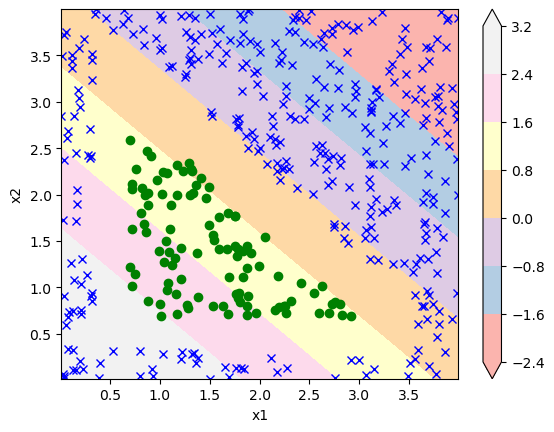

In [70]:
step_predict = lambda data: vqmodel.lin1ac(torch.Tensor(data))[0].detach().numpy().reshape(-1,1)[0]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'vq_h1.pdf')

tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


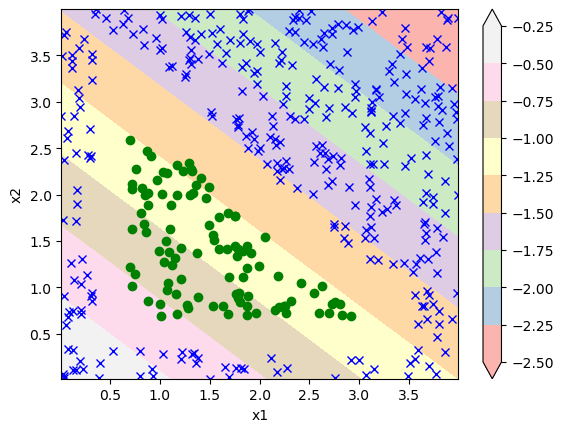

In [71]:
step_predict = lambda data: vqmodel.lin1ac(torch.Tensor(data))[0].detach().numpy().reshape(-1,1)[1]
step_y_pred = step_predict(X)
plot(X, Y, step_predict,'vq_h2.pdf')

tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


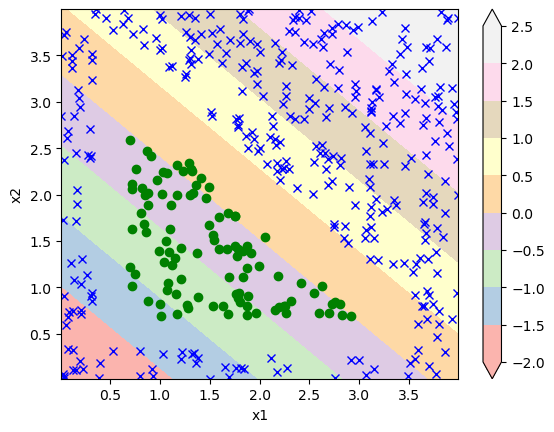

In [72]:
step_predict = lambda data: vqmodel.lin1ac(torch.Tensor(data))[0].detach().numpy().reshape(-1,1)[2]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'vq_h3.pdf')


tensor(0.0103) tensor(3.9939)
tensor(0.0142) tensor(3.9994)


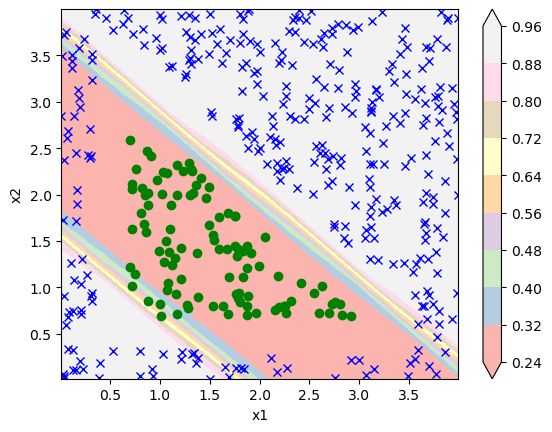

In [73]:
step_predict = lambda data: vqmodel(torch.Tensor(data))[0].detach().numpy()
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'vq_o.pdf')